<a href="https://colab.research.google.com/github/temporalxtemporal00/TICKERY/blob/master/Entrenamiento_Modelo_Asignacion_Categorias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Entrenamiento del Modelo de Clasificación de Tickets
Este notebook entrena un modelo para predecir la categoría de un ticket basado en su título y descripción.

## 📥 Paso 1: Cargar archivo Excel

In [ ]:
import pandas as pd

# Subir archivo desde Google Colab
from google.colab import files
uploaded = files.upload()

# Cargar archivo Excel
df = pd.read_excel(next(iter(uploaded)))
df.head()

Saving Dataset_Entrenamiento_Modelo_Asignacion_automatica.xlsx to Dataset_Entrenamiento_Modelo_Asignacion_automatica (7).xlsx


,titulo,descripcion,prioridad,categoria
0,regla de negocio nueva,implementar validación para promociones person...,baja,requerimiento funcional
1,falla en hardware,"terminal 1 presenta error de hardware, no arranca",alta,soporte técnico
2,solicitud de funcionalidad,se solicita función para anular boletas duplic...,alta,requerimiento funcional
3,análisis de requerimiento,analizar viabilidad de agregar filtros en repo...,baja,requerimiento funcional
4,error intellifact,intellifact no actualiza la base de datos de v...,alta,base de datos


## 🔄 Paso 2: Preprocesamiento de datos
Se unirá el título y la descripción como entrada textual. No se usará la prioridad en el modelo.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Crear campo de entrada uniendo título y descripción
df["texto_completo"] = df["titulo"].fillna("") + " " + df["descripcion"].fillna("")
df["entrada_texto"] = df["texto_completo"]

# Codificar las categorías (target)
label_encoder = LabelEncoder()
df["categoria_encoded"] = label_encoder.fit_transform(df["categoria"])

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    df["entrada_texto"], df["categoria_encoded"], test_size=0.2, random_state=42
)

## 🤖 Paso 3: Entrenamiento y Evaluación del Modelo

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Pipeline del modelo
modelo = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("classifier", MultinomialNB())
])

# Entrenar
modelo.fit(X_train, y_train)

import joblib

# Guardar el pipeline entrenado como archivo .pkl
joblib.dump(modelo, 'modelo_asignacion_tecnico.pkl')

# Guardar el encoder
joblib.dump(label_encoder, 'encoder_asignacion.pkl')



# Evaluar
y_pred = modelo.predict(X_test)

print("🔎 Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("📊 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

🔎 Reporte de clasificación:
                         precision    recall  f1-score   support

          base de datos       0.99      0.99      0.99       236
requerimiento funcional       0.99      0.99      0.99       212
        soporte técnico       0.98      0.99      0.98       212

               accuracy                           0.99       660
              macro avg       0.99      0.99      0.99       660
           weighted avg       0.99      0.99      0.99       660

📊 Matriz de confusión:
[[233   0   3]
 [  1 210   1]
 [  1   2 209]]


## 🧪 Paso 4: Prueba de predicciones manuales

In [ ]:
# Asegúrate de que label_encoder y modelo ya estén definidos y entrenados

tickets_prueba = [
    {
        "titulo": "solicito reportes de ventas",
        "descripcion": "solicito que me envien reporte de ventas de todo el año"
    },
    {
        "titulo": "análisis de requerimiento",
        "descripcion": "analizar viabilidad de agregar filtros en reportes por fecha."
    },
    {
        "titulo": "problemas cuadratura",
        "descripcion": "la caja no cierra correctamente, descuadre en el arqueo."
    },
    {
        "titulo": "scanner da fallo",
        "descripcion": "el lector de códigos de barras no responde en tienda sur."
    }
]

print("Resultados de predicción:\n")
for i, ticket in enumerate(tickets_prueba):
    entrada = ticket["titulo"].strip() + " " + ticket["descripcion"].strip()
    prediccion = modelo.predict([entrada])[0]
    categoria_predicha = label_encoder.inverse_transform([prediccion])[0]
    print(f"{i+1}. '{ticket['titulo']}' → Categoría predicha: {categoria_predicha}")




Resultados de predicción:

1. 'solicito reportes de ventas' → Categoría predicha: base de datos
2. 'análisis de requerimiento' → Categoría predicha: requerimiento funcional
3. 'problemas cuadratura' → Categoría predicha: base de datos
4. 'scanner da fallo' → Categoría predicha: soporte técnico


🔍 Ejemplos donde el modelo se equivocó:

📝 Texto: Promoción no encontrada Buenos días, las siguiente promociones que deberían estar activas hoy no están pasando, se solicita activar promociones en la base de datos Promociones Puntuales: - CSQ Trigo 473 (3) 75.00 solo FDS del 22 al 25 de mayo - Coronita 210 (3) 46.90 solo FDS del 22 al 25 de mayo Tampoco podemos aplicar la promoción libre para esos artículos por favor su apoyo ATTE: TIENDA LINCE
✅ Real: requerimiento funcional | ❌ Predicha: base de datos
--------------------------------------------------------------------------------
📝 Texto: 29.01 Subida de Precios Actualizar precios y creación de nuevos precios
✅ Real: soporte técnico | ❌ Predicha: requerimiento funcional
--------------------------------------------------------------------------------
📝 Texto: no se muestras lista de tiendas sucursales  de empresa en sistema en el sistema no se estan mostrando la lista de tiendas sucursales que tiene asociado la empresa
✅ Real: soport

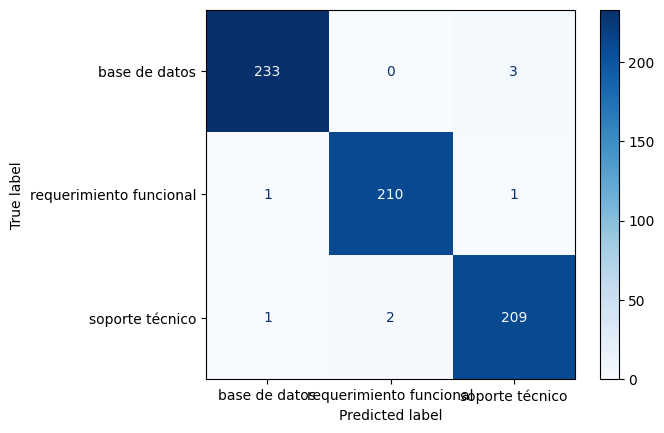

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ⚠️ Asegúrate de tener estas variables ya definidas en tu entorno:
# X_test, y_test, modelo, label_encoder

# 1. Predecir categorías sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# 2. Convertir los índices codificados a nombres de categorías
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# 3. Crear un DataFrame con resultados
df_errores = pd.DataFrame({
    "texto": X_test,
    "categoría_real": y_test_labels,
    "categoría_predicha": y_pred_labels
})

# 4. Filtrar errores de clasificación
errores_confundidos = df_errores[df_errores["categoría_real"] != df_errores["categoría_predicha"]]

# 5. Mostrar los primeros errores detectados
print("🔍 Ejemplos donde el modelo se equivocó:\n")
for index, row in errores_confundidos.head(10).iterrows():
    print(f"📝 Texto: {row['texto']}")
    print(f"✅ Real: {row['categoría_real']} | ❌ Predicha: {row['categoría_predicha']}")
    print("-" * 80)

# 6. Matriz de confusión con nombres de categorías
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=label_encoder.classes_,
    cmap="Blues"
)
